Random Seeding & Enable Determinism to produce replicable results

In [1]:
import tensorflow as tf
from tensorflow import keras
import os

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()
import time

2024-06-26 11:58:53.006057: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-26 11:58:53.132367: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 11:58:53.132400: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 11:58:53.150781: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-26 11:58:53.188192: I tensorflow/core/platform/cpu_feature_guar

Importing libraries and modules

In [2]:
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from keras import layers
from keras.models import Sequential
from keras.layers import LSTM, Dense
from pickle import dump

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(tf.__version__) 
# tf.random.set_seed(123)

from tensorboard.plugins.hparams import api as hp

2.15.0


In [3]:
features = ["Neck_right-ward_rotation", "LeftElbow_flexion", "RightElbow_flexion", "LeftKnee_flexion", "RightKnee_flexion", "Thorax_extension", "Thorax_lateral_flexion_rotation"]

Load Dataset

In [4]:
# filename = "dataset.csv"
# filepath = f"/home/RUS_CIP/st179677/project/dataset/5 users/60 FPS - clipped/{filename}"

# df = pd.read_csv(filepath)
# labels_df = df["label"]
# # df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
# # df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)



# df = df[features]
# df
# # labels_df

In [5]:
train_df = pd.read_csv("/home/RUS_CIP/st179677/project/dataset/5 users/60 FPS - clipped/train.csv")
train_labels = train_df["label"]
train_df = train_df[features]

test_df = pd.read_csv("/home/RUS_CIP/st179677/project/dataset/5 users/60 FPS - clipped/test.csv")
test_labels = test_df["label"]
test_df = test_df[features]

train_df

,Neck_right-ward_rotation,LeftElbow_flexion,RightElbow_flexion,LeftKnee_flexion,RightKnee_flexion,Thorax_extension,Thorax_lateral_flexion_rotation
0,3.549500,3.371736,6.512918,-0.027976,-9.991233,4.250910,1.359221
1,3.535295,3.384024,6.488364,-0.044235,-10.002430,4.234431,1.358340
2,3.520810,3.393730,6.458497,0.000000,-10.025780,4.219234,1.354973
3,3.515579,3.396440,6.445703,0.000000,-10.041360,4.213845,1.352576
4,3.502299,3.399379,6.424006,0.000000,-10.073370,4.209521,1.349454
...,...,...,...,...,...,...,...
37822,-7.042944,19.845620,2.196420,-25.599820,-15.201360,-5.448487,-4.488398
37823,-7.032102,16.464140,1.834937,-25.603310,-14.568030,-5.302969,-4.015072
37824,-6.960776,10.478350,1.033061,-25.585250,-13.215460,-5.018915,-3.140173
37825,-6.853118,5.816689,-0.027976,-25.631230,-11.444740,-4.787452,-2.385553


In [6]:
test_df

,Neck_right-ward_rotation,LeftElbow_flexion,RightElbow_flexion,LeftKnee_flexion,RightKnee_flexion,Thorax_extension,Thorax_lateral_flexion_rotation
0,2.765412,20.814490,30.12619,-8.229175,-13.131230,6.504000,1.627866
1,2.636559,21.221590,30.88624,-8.038465,-12.906960,6.463595,1.625073
2,2.508973,21.468310,31.50667,-7.943271,-12.765620,6.425258,1.627737
3,2.449764,21.518730,31.76913,-7.920478,-12.722180,6.405085,1.628181
4,2.332213,21.480970,32.18284,-7.882718,-12.654570,6.368090,1.629171
...,...,...,...,...,...,...,...
9577,4.687718,6.453425,10.98043,-22.254830,-5.575275,2.471084,-1.660658
9578,4.459927,7.567453,11.02977,-22.112130,-4.936616,2.437349,-1.303692
9579,4.323501,8.213532,11.07498,-22.051290,-4.675375,2.496616,-1.127473
9580,4.081591,9.373895,11.12502,-21.856070,-4.978978,2.689409,-0.686530


In [7]:
scaler = StandardScaler()
train_df = pd.DataFrame(scaler.fit_transform(train_df), columns = train_df.columns, index=train_df.index)

# save the scaler
dump(scaler, open('scaler.pkl', 'wb'))
test_df = pd.DataFrame(scaler.transform(test_df), columns = test_df.columns, index=test_df.index)

train_df

,Neck_right-ward_rotation,LeftElbow_flexion,RightElbow_flexion,LeftKnee_flexion,RightKnee_flexion,Thorax_extension,Thorax_lateral_flexion_rotation
0,0.017396,-0.930361,-0.716564,0.822575,0.576255,0.610628,0.473599
1,0.016010,-0.929954,-0.717281,0.822009,0.575842,0.609845,0.473469
2,0.014597,-0.929633,-0.718154,0.823549,0.574979,0.609123,0.472970
3,0.014087,-0.929543,-0.718527,0.823549,0.574404,0.608867,0.472616
4,0.012791,-0.929445,-0.719161,0.823549,0.573222,0.608661,0.472154
...,...,...,...,...,...,...,...
37822,-1.015844,-0.384439,-0.842628,-0.067633,0.383842,0.149849,-0.391882
37823,-1.014786,-0.496497,-0.853185,-0.067755,0.407231,0.156762,-0.321827
37824,-1.007829,-0.694858,-0.876604,-0.067126,0.457183,0.170257,-0.192337
37825,-0.997327,-0.849339,-0.907591,-0.068727,0.522576,0.181252,-0.080649


Plotting Distribution of Classes

In [8]:
# Create 51 empty lists with names X0 to X50
X0, X1, X2, X3, X4, X5, X6, x0, x1, x2, x3, x4, x5, x6, y_train, y_test = ([] for _ in range(16))

Create Sequences from Dataset

In [9]:
timesteps = 60
step_size = 1  # Adjust this value as needed to control the stride

"""TRAIN DATA"""
# Iterate over the range of rows in df
for i in range(0, train_df.shape[0] - timesteps):
    for j in range(7):  # Loop for column indexing
        globals()[f'X{j}'].append(train_df.iloc[i:i + timesteps, j])

# Iterate over the range of rows in labels_df
for i in range(0, train_labels.shape[0] - timesteps):
    y_train.append(train_labels.iloc[i + timesteps])

"""TEST DATA"""
# Iterate over the range of rows in df
for i in range(0, test_df.shape[0] - timesteps):
    for j in range(7):  # Loop for column indexing
        globals()[f'x{j}'].append(test_df.iloc[i:i + timesteps, j])

# Iterate over the range of rows in labels_df
for i in range(0, test_labels.shape[0] - timesteps):
     y_test.append(test_labels.iloc[i + timesteps])

In [10]:
type(y_train), type(y_test)
len(y_train), len(y_test)

(37767, 9522)

In [11]:
X0, X1, X2, X3, X4, X5, X6, x0, x1, x2, x3, x4, x5, x6, y_train, y_test = np.array(X0), np.array(X1),  np.array(X2),  np.array(X3),  np.array(X4),  np.array(X5),  np.array(X6), np.array(x0), np.array(x1),  np.array(x2),  np.array(x3),  np.array(x4),  np.array(x5),  np.array(x6), np.array(y_train), np.array(y_test)

In [12]:
X0.shape, x0.shape

((37767, 60), (9522, 60))

In [13]:
X0

array([[ 0.01739563,  0.01601   ,  0.01459707, ...,  0.0108171 ,
         0.00923931,  0.00814652],
       [ 0.01601   ,  0.01459707,  0.01408681, ...,  0.00923931,
         0.00814652,  0.00535985],
       [ 0.01459707,  0.01408681,  0.01279141, ...,  0.00814652,
         0.00535985,  0.00254978],
       ...,
       [ 0.84678727,  0.84285816,  0.81871773, ..., -1.00492814,
        -1.0158439 , -1.01478632],
       [ 0.84285816,  0.81871773,  0.79589318, ..., -1.0158439 ,
        -1.01478632, -1.00782883],
       [ 0.81871773,  0.79589318,  0.73137109, ..., -1.01478632,
        -1.00782883, -0.99732733]])

In [14]:
X_train = np.stack([X0, X1, X2, X3, X4, X5, X6], axis=2)
X_test = np.stack([x0, x1, x2, x3, x4, x5, x6], axis=2)
print(X_train.shape, X_test.shape)

(37767, 60, 7) (9522, 60, 7)


In [15]:
#splitting dataset into train, test and validation
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=2, stratify=y_train)

print("X train :",X_train.shape)
print("y train:", Y_train.shape)
print("X test :", X_test.shape)
print("y test :" ,y_test.shape)
print("X val :" ,X_val.shape)
print("y val :" ,Y_val.shape)

X train : (33990, 60, 7)
y train: (33990,)
X test : (9522, 60, 7)
y test : (9522,)
X val : (3777, 60, 7)
y val : (3777,)


{0: 8716, 1: 6758, 2: 6420, 3: 5906, 4: 6190}

In [16]:
#LSTM Model

model = Sequential()
model.add(LSTM(16, input_shape=(60,7), return_sequences=False))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1536      
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 5)                 85        
                                                                 
Total params: 1893 (7.39 KB)
Trainable params: 1893 (7.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-06-26 11:59:08.754066: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2024-06-26 11:59:08.754093: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: ias-1316
2024-06-26 11:59:08.754098: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: ias-1316
2024-06-26 11:59:08.754188: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 535.183.1
2024-06-26 11:59:08.754203: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.171.4
2024-06-26 11:59:08.754207: E external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:244] kernel version 535.171.4 does not match DSO version 535.183.1 -- cannot find working devices in this configuration


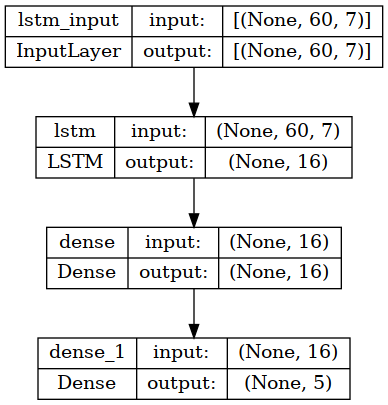

In [17]:
from keras.utils import plot_model
plot_model(model,show_shapes= True, show_layer_names= True, to_file='/home/RUS_CIP/st179677/project/LSTM.png')

In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath_1 = '/home/RUS_CIP/st179677/project/model/models/LSTM/lstm_best_model.h5'


logdir = os.path.join("logs", datetime.datetime.now().strftime("softmax_%Y_%m_%d-%H_%M_%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

checkpoint = ModelCheckpoint(filepath=filepath_1, 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)

callbacks_list = [checkpoint, tensorboard_callback, early_stopping] 

In [19]:
#LSTM model
from keras.optimizers import Adam

adam = Adam(learning_rate=0.0001)
# chk = ModelCheckpoint('best_model.pkl', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history=model.fit(X_train, Y_train ,validation_data=(X_val, Y_val), epochs=200, callbacks=callbacks_list, batch_size=32)

Epoch 1/200
1060/1063 [============================>.] - ETA: 0s - loss: 1.2187 - accuracy: 0.6239
Epoch 1: val_accuracy improved from -inf to 0.81149, saving model to /home/RUS_CIP/st179677/project/model/models/LSTM/lstm_best_model.h5
1063/1063 [==============================] - 8s 7ms/step - loss: 1.2177 - accuracy: 0.6244 - val_loss: 0.7865 - val_accuracy: 0.8115
Epoch 2/200
  18/1063 [..............................] - ETA: 6s - loss: 0.7911 - accuracy: 0.8021

/home/RUS_CIP/st179677/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1063/1063 [==============================] - ETA: 0s - loss: 0.4701 - accuracy: 0.9004
Epoch 2: val_accuracy improved from 0.81149 to 0.94149, saving model to /home/RUS_CIP/st179677/project/model/models/LSTM/lstm_best_model.h5
1063/1063 [==============================] - 7s 6ms/step - loss: 0.4701 - accuracy: 0.9004 - val_loss: 0.2693 - val_accuracy: 0.9415
Epoch 3/200
1058/1063 [============================>.] - ETA: 0s - loss: 0.1909 - accuracy: 0.9634
Epoch 3: val_accuracy improved from 0.94149 to 0.96929, saving model to /home/RUS_CIP/st179677/project/model/models/LSTM/lstm_best_model.h5
1063/1063 [==============================] - 7s 6ms/step - loss: 0.1908 - accuracy: 0.9635 - val_loss: 0.1486 - val_accuracy: 0.9693
Epoch 4/200
1061/1063 [============================>.] - ETA: 0s - loss: 0.1227 - accuracy: 0.9794
Epoch 4: val_accuracy improved from 0.96929 to 0.97935, saving model to /home/RUS_CIP/st179677/project/model/models/LSTM/lstm_best_model.h5
1063/1063 [==================

In [20]:
# # Load the TensorBoard notebook extension
%load_ext tensorboard

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


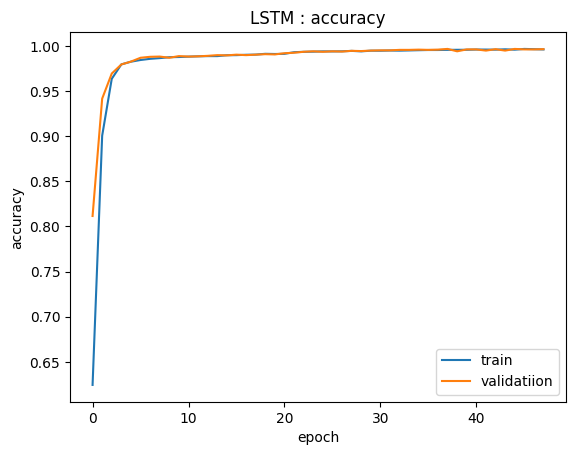

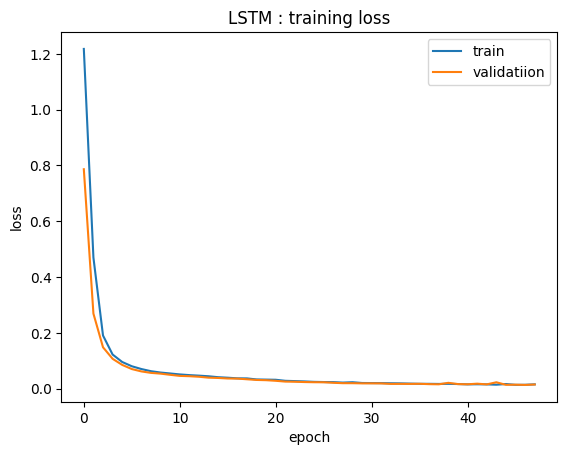

In [21]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM : accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validatiion'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM : training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validatiion'], loc='upper right')
plt.show()

In [22]:
#predicting on test datset
from keras.models import load_model
from sklearn.metrics import accuracy_score

start_time = time.time()
classify_x=model.predict(X_test)
end_time = time.time() - start_time
print(f"Inference time = {end_time}")
# print(classify_x)
classes_x=np.argmax(classify_x,axis=1)
# y_test= np.argmax(Y_test,axis=1)
print(classes_x)
classes_x = pd.DataFrame(classes_x)
classes_x.to_csv("prediciton.csv", index=False)
accuracy=accuracy_score(y_test, classes_x)
accuracy

298/298 [==============================] - 1s 2ms/step
Inference time = 0.7925817966461182
[0 0 0 ... 4 4 4]


0.9611426170972485

Performance Metrics

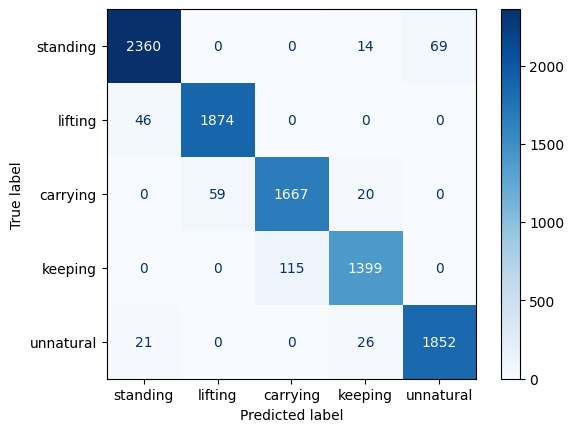

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2443
           1       0.97      0.98      0.97      1920
           2       0.94      0.95      0.95      1746
           3       0.96      0.92      0.94      1514
           4       0.96      0.98      0.97      1899

    accuracy                           0.96      9522
   macro avg       0.96      0.96      0.96      9522
weighted avg       0.96      0.96      0.96      9522



In [23]:
labels = ["standing", "lifting", "carrying", "keeping", "unnatural"]

cm = confusion_matrix(y_test, classes_x)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, classes_x))

Save Model File

In [24]:
# from keras.saving import save_model


# model_name = f"{round(accuracy*100,2)}_LSTM.h5"
# model_filepath=f'/home/RUS_CIP/st179677/project/model/{model_name}'

# model.save(model_filepath)